<a href="https://colab.research.google.com/github/SplashTheBatya/Pandas-And-ML-VSU/blob/main/shooting_method_Kamalov_N_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Постановка решаемой краевой задачи:

Начальное условие:
\begin{equation}
y'' + y = x, \quad y(0) = 0  \quad y(1) = 0 \tag{1}
\end{equation}



# 2.Приведение краевой задачи к задаче Коши

Приведение краевой задачи к задаче Коши:

Сделаем замену:
\begin{equation} 
y'(x) = z(x)
\end{equation}

Тогда кравевую задачу (1) можно предствить в виде:
\begin{equation}
y' = z \quad y(0) = 0
\end{equation}
\begin{equation}
z' = x - y \quad z(0) = y'(0) = \eta
\end{equation}


Для метода Эйлера с пересчётом решение задачи Коши примет следующий вид:

\begin{equation}
x_{i+1} = x_i + h, \quad y_{i+1} = y_i + h z_i, \quad z_{i+1} = z_i + \frac{h}{2}[f(x_i, y_i, z_i) + f(x_{i+1},y_{i+1},z_{i+1})] 
\end{equation}
\begin{equation}
x_0 = 0, \quad y_0 = 0, \quad z_0 = \eta 
\end{equation}

In [8]:
import numpy as np


a = 0
b = 1
A = 0
B = 0


def f(x, u):
  return u[0] - x


def F(f):
  return lambda x, u: np.append(u[1:], f(x, u))


def recount(f, a, b, u0, h):
  func = F(f)

  x = a
  u = np.array(u0)
  res = [(x, u[0])]
  
  while x + h <= b:
    u = u + h / 2 * (func(x, u) + func(x + h, u + h * func(x, u)))
    x = x + h
    res.append((x, u[0]))
  
  return res

При $\eta = 0.1$ получим следующие решения задачи Коши:

In [21]:
recount(f, a, b, [A, 1], 0.1)

[(0, 0),
 (0.1, 0.1),
 (0.2, 0.2),
 (0.30000000000000004, 0.30000000000000004),
 (0.4, 0.4),
 (0.5, 0.5),
 (0.6, 0.6),
 (0.7, 0.7),
 (0.7999999999999999, 0.7999999999999999),
 (0.8999999999999999, 0.8999999999999999),
 (0.9999999999999999, 0.9999999999999999)]

При данном значении $\eta$ ошибка имеет следующее значение:

In [22]:
def err(actual, res):
  return actual - res[-1][1] 

err(B, _)

-0.9999999999999999

Выберем $\eta_1 = 0.5$,  $\eta_2 = 1$

In [39]:
eta_1 = 0.1
eta_2 = 0.5

print('eta_1 =', eta_1, '\terr =', err(B, recount(f, a, b, [A, eta_1], 0.1)))
print('eta_2 =', eta_2, '\terr =', err(B, recount(f, a, b, [A, eta_2], 0.1)))

eta_1 = 0.1 	err = 0.055492937798602704
eta_2 = 0.5 	err = -0.41361503455633186


In [40]:
def solve_chord(f, a, b, A, B, eta_1, eta_2, h=0.1, eps=1e-5):
  eta = [eta_1, eta_2]
  hist = [recount(f, a, b, [A, eta_1], h), recount(f, a, b, [A, eta_2], h)]
  errors = [err(B, hist[0]), err(B, hist[1])]

  while abs(eta[-2] - eta[-1]) > eps:
    eta.append(eta[-1] - (eta[-1] - eta[-2]) * errors[-1] / (errors[-1] - errors[-2]))
    hist.append(recount(f, a, b, [A, eta[-1]], h))
    errors.append(err(B, hist[-1]))

  return hist[-1], hist

res, hist = solve_chord(f, a, b, A, B, eta_1, eta_2, h=0.01, eps=0.01)

In [41]:
print('eta =', res[0])

arr = np.array(res)
print(arr[:, 0:2])

eta = (0, 0.0)
[[0.00000000e+00 0.00000000e+00]
 [1.00000000e-02 1.46407324e-03]
 [2.00000000e-02 2.92729288e-03]
 [3.00000000e-02 4.38880528e-03]
 [4.00000000e-02 5.84775660e-03]
 [5.00000000e-02 7.30329276e-03]
 [6.00000000e-02 8.75455933e-03]
 [7.00000000e-02 1.02007015e-02]
 [8.00000000e-02 1.16408638e-02]
 [9.00000000e-02 1.30741904e-02]
 [1.00000000e-01 1.44998245e-02]
 [1.10000000e-01 1.59169089e-02]
 [1.20000000e-01 1.73245851e-02]
 [1.30000000e-01 1.87219940e-02]
 [1.40000000e-01 2.01082754e-02]
 [1.50000000e-01 2.14825679e-02]
 [1.60000000e-01 2.28440090e-02]
 [1.70000000e-01 2.41917347e-02]
 [1.80000000e-01 2.55248800e-02]
 [1.90000000e-01 2.68425782e-02]
 [2.00000000e-01 2.81439610e-02]
 [2.10000000e-01 2.94281586e-02]
 [2.20000000e-01 3.06942994e-02]
 [2.30000000e-01 3.19415101e-02]
 [2.40000000e-01 3.31689155e-02]
 [2.50000000e-01 3.43756382e-02]
 [2.60000000e-01 3.55607990e-02]
 [2.70000000e-01 3.67235164e-02]
 [2.80000000e-01 3.78629068e-02]
 [2.90000000e-01 3.89780840e

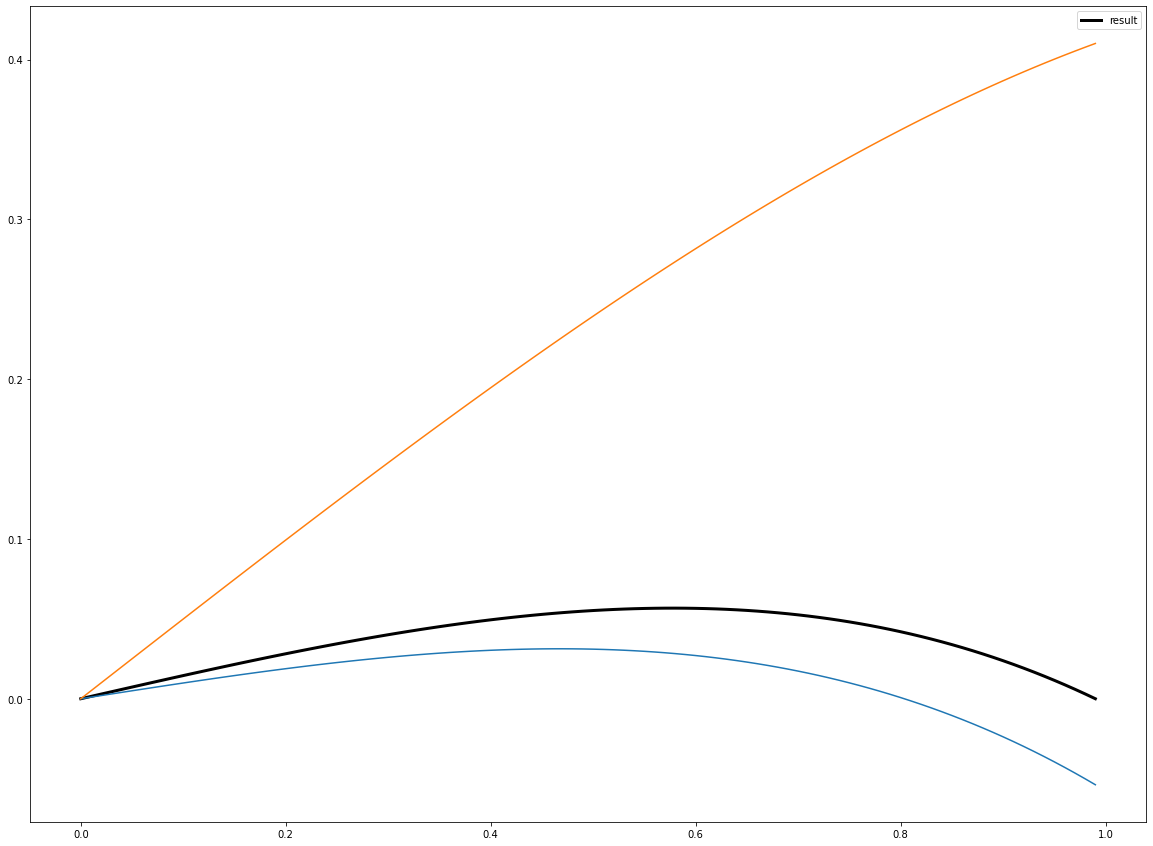

In [42]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 15)

fig, ax = plt.subplots()

arr = np.array(res)
x = arr[:, 0]
y = arr[:, 1]
line = ax.plot(x, y, label='result', linewidth=3, color='black')

for r in hist[:-2]:
  arr = np.array(r)
  x = arr[:, 0]
  y = arr[:, 1]
  line = ax.plot(x, y)

ax.legend()
plt.show()